# White Dwarf Operating Conditions

In [3]:
#Import required modules
import bamboo as bam
import bamboo.cooling as cool
import bamboo.materials


import numpy as np
import matplotlib.pyplot as plt
import pypropep as ppp
import bamboo.plot
from CoolProp.CoolProp import PropsSI

### *Engine setup*

In [4]:
'''Chamber conditions'''
pc = 10e5                   #Chamber pressure (Pa)
mdot = 1.05                 #Mass flow rate (kg/s)
p_amb = 1.01325e5           #Ambient pressure (Pa). 1.01325e5 is sea level atmospheric.
OF_ratio = 3.5              #Oxidiser/fuel mass ratio
water_mass_fraction = 0.40  #Fraction of the fuel that is water, by mass

'''Get combustion properties from pypropep'''
ppp.init()
e = ppp.Equilibrium()
ipa = ppp.PROPELLANTS['ISOPROPYL ALCOHOL']
water = ppp.PROPELLANTS['WATER']
n2o = ppp.PROPELLANTS['NITROUS OXIDE']

#Add propellants by mass fractions (note the mass fractions can add up to more than 1)
e.add_propellants_by_mass([(ipa, 1-water_mass_fraction), (water, water_mass_fraction), (n2o, OF_ratio)])

#Adiabatic combustion using chamber pressure                      
e.set_state(P = pc/1e5, type='HP')                      

gamma = e.properties.Isex   #pyrpopep uses 'Isex' for the ratio of specific heats
cp = 1000*e.properties.Cp   #Cp is given in kJ/kg/K, we want J/kg/K
Tc = e.properties.T

'''Set up the engine object'''
perfect_gas = bam.PerfectGas(gamma = gamma, cp = cp)    #Gas for frozen flow
chamber_conditions = bam.ChamberConditions(pc, Tc, mdot)
nozzle = bam.Nozzle.from_engine_components(perfect_gas, chamber_conditions, p_amb, type = "rao")
engine = bam.Engine(perfect_gas, chamber_conditions, nozzle)

'''Chamber and wall geometry'''
Ac = np.pi*0.06**2                      #Chamber cross-sectional area (m^2)
L_star = 1.2                           #L_star = Volume_c/Area_t
chamber_length = L_star*nozzle.At/Ac   #Length of the combustion chamber
engine.add_geometry(chamber_length = chamber_length,
                    chamber_area = Ac,
                    inner_wall_thickness = 2e-3,
                    outer_wall_thickness = 2e-3)


Loaded 1921 thermo species
Loaded 1031 propellants
NOTE: Area ratio is outside of data range for Rao bell nozzle graphs (minimum 3.7, maximum 47). Using a 15 deg cone nozzle instead.


### *Print everything*

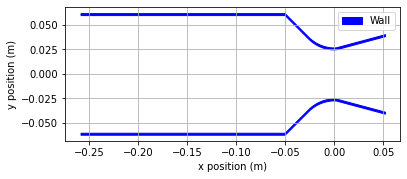

Rao type nozzle (length fraction = 0.8). 
Length = 0.0516840083334008 m 
Throat area = 0.001961858319865379 m^2 
Exit area = 0.004656992693938177 m^2 
Area ratio = 2.3737660598537698 
Rao inflection angle = 14.999999999999998 deg 
Rao exit angle = 14.999999999999998 deg from bamboo (nan deg from Rao graphs) 

Nozzle throat area   = 0.001961858319865379 m^2
Nozzle exit area     = 0.004656992693938177 m^2
Chamber length       = 0.20815963283502384 m

Nozzle length (total)= 0.10222096435607028 m
Nozzle throat radius = 25.0 mm
Nozzle exit radius   = 38.5 mm

Sea level thrust     = 2.5013714627240384 kN      (using perfect gas relations)
Sea level Isp        = 242.92276525904927 s       (using perfect gas relations)

Chamber Temperature  = 2868.056969661525 K
Gamma                = 1.1401136288802078
cp                   = 4014.403129086916 J/kg/K

Combustion product composition:
[('N2', 0.44747502468273587), ('H2O', 0.31267294528360934), ('CO2', 0.10401242950642305), ('CO', 0.0657757583347

In [7]:
engine.plot_geometry()
plt.show()

print(nozzle)

print("")
print(f"Nozzle throat area   = {nozzle.At} m^2")
print(f"Nozzle exit area     = {nozzle.Ae} m^2")
print(f"Chamber length       = {chamber_length} m")

print("")
print(f"Nozzle length (total)= {engine.geometry.x_max - engine.geometry.x_chamber_end} m")
print(f"Nozzle throat radius = {1e3*(nozzle.At/np.pi)**0.5:.1f} mm")
print(f"Nozzle exit radius   = {1e3*(nozzle.Ae/np.pi)**0.5:.1f} mm")

'''Check the thrust and specific impulse'''
print("")
print(f"Sea level thrust     = {engine.thrust(1e5)/1000} kN      (using perfect gas relations)")
print(f"Sea level Isp        = {engine.isp(1e5)} s       (using perfect gas relations)")

print("")
print(f"Chamber Temperature  = {Tc} K")
print(f"Gamma                = {gamma}")
print(f"cp                   = {cp} J/kg/K")

print("\nCombustion product composition:")
print(e.composition_sorted[0:8])